
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing


### Deskripsi
Per bulan Juli 2023, Apple dan Samsung memimpin industri ponsel pintar (smartphone) di seluruh dunia, dengan angka gabungan 52,61% dari total pangsa pasar (market share) [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). Sebagai fitur utama yang wajib hadir pada smartphone masa kini, Apple dan Samsung berlomba-lomba menciptakan teknologi kamera agar Anda bisa mengabadikan foto terbaik meski dalam kondisi minim cahaya.
- Pada bulan September 2019, Apple memperkenalkan teknologi **Deep Fusion** (melalui seri iPhone 11) untuk mengatasi tantangan tersebut. Peningkatannya, yang diberi nama **Photonic Engine**, diperkenalkan pada September 2022 melalui seri iPhone 14 terbaru [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- Sementara itu, pada bulan Februari 2023, Samsung memperkenalkan teknologi **Adaptive Tetra-squared Pixel Sensor** dengan seri Samsung S23 terbarunya sebagai solusi lain untuk masalah serupa, menjanjikan hasil foto terang yang luar biasa dari gambar bernuansa gelap [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

Kedua teknologi ini bekerja dengan menggabungkan beberapa piksel yang berdekatan menjadi satu piksel, menggunakan operasi **Max Pooling**. Dalam hal ini, tugas Anda adalah mereplikasi konsep tersebut (mencerahkan foto dengan warna gelap), lalu membandingkan hasilnya dengan pendekatan lain, yaitu **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

### Import libraries

In [ ]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [ ]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [ ]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
**JANGAN LUPA** untuk upload file "photo1.jpeg" dan "lena.png" ke Google Colab.

In [ ]:
img = imread("/content/sample_data/photo1.jpeg")

In [ ]:
lena = cv2.imread("/content/sample_data/lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

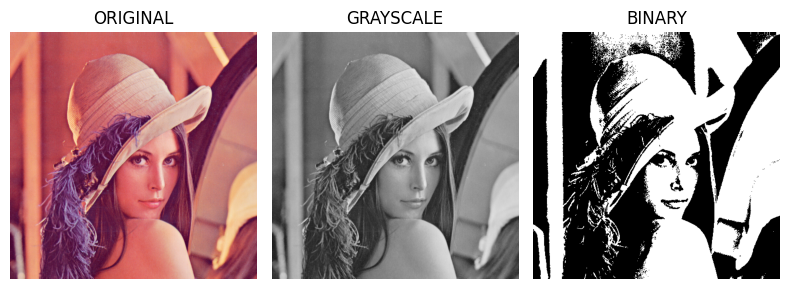

In [ ]:
# original image
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # Ubah kanal warna dari BGR ke RGB dengan cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # Ubah kanal warna dari BGR ke grayscale dengan cv2.COLOR_BGR2GRAY
img_grayscaled = cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY) # Ubah kanal warna dari grayscale ke binary dengan cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])

* Check their histograms

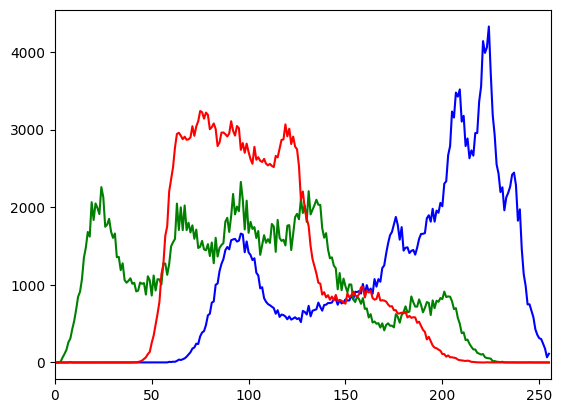

In [ ]:
# Plot histogram dari gambar asli
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    histr = cv2.calcHist([img_lena], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

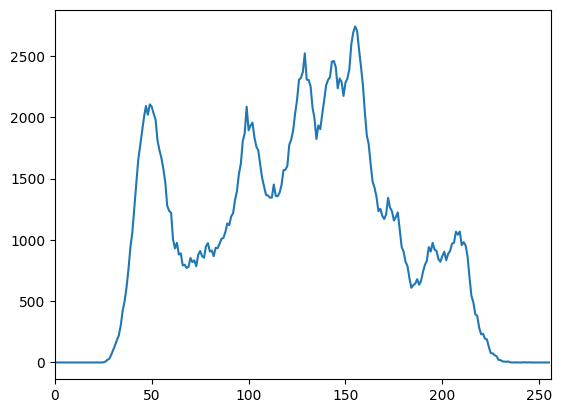

In [ ]:
# Plot histogram dari gambar grayscale
histogram = cv2.calcHist([img_grayscaled], [0], None, [256], [0, 256])

plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

### Max Pooling (using Scikit-image)

In [ ]:
BLOCK_SIZE = (4, 4, 1)

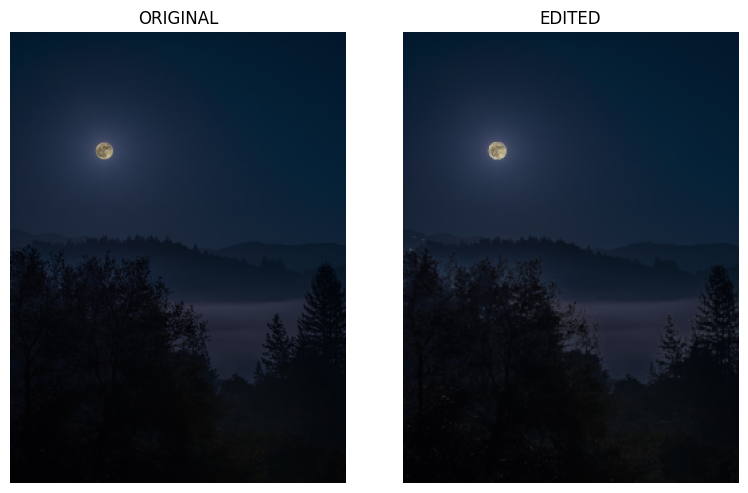

In [ ]:
img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

<ipython-input-11-c192e6f61ca2>:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_torch = from_numpy(img).permute(2, 0, 1).float()


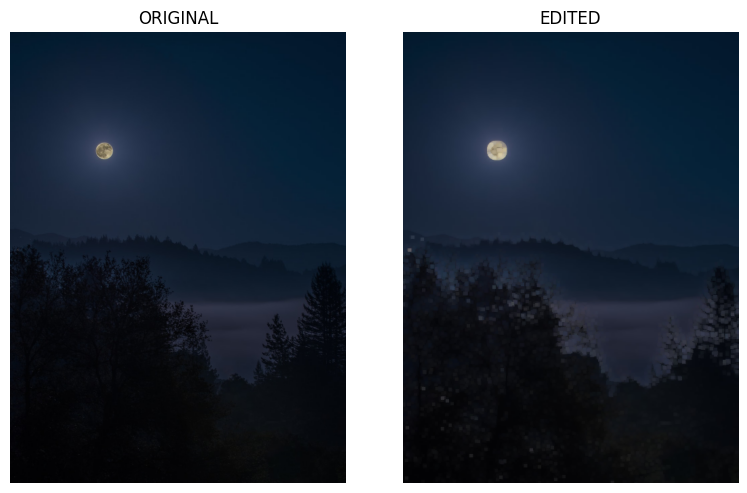

In [ ]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# PERTANYAAN
# Apa keunggulan operasi Max Pooling dari PyTorch dibandingkan yang dari Scikit-image?

[ ANSWER HERE ]

setelah di lakukan perbandingan, hasil visual Max Pooling dari Pytorch jauh lebih konsisten dengan hasil visual gambar yang lebih cerah di bandingkan hasil visual Max Pooling dari Scikit-image, hal ini karena Max Pooling dari Pytorch unggul dalam konsistensi ukuran output serta lebih fleksibel karena memungkinkan menggunakan stride, padding serta kernel size sehingga dapat menyesuaikan secara optimal dengan memberikan hasil visual yang optimal.

### Min Pooling and Average Pooling

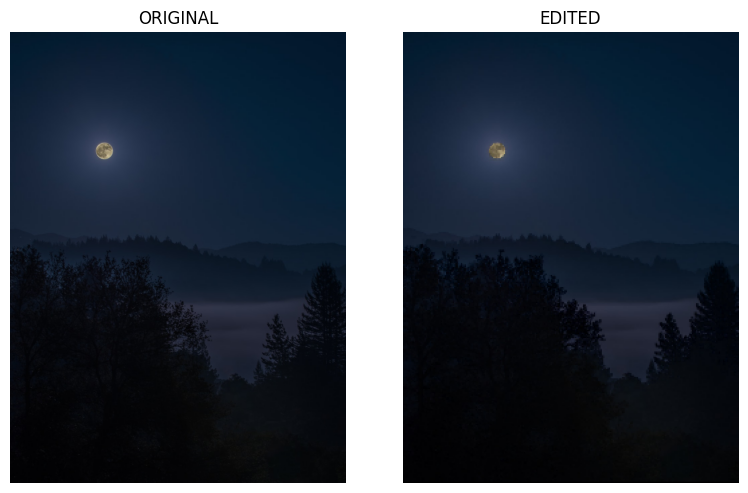

In [ ]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min) # Panggil ulang block_reduce(), tetapi dengan func=np.min
plot(imgs=[img, img_edited_min])

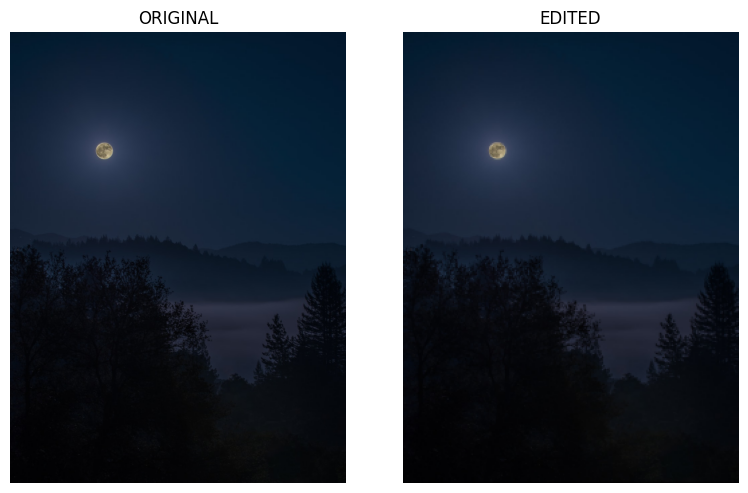

In [ ]:
img_edited_avg = block_reduce(img, block_size=BLOCK_SIZE, func=np.mean).astype(int) # Panggil ulang block_reduce().astype(int), tetapi dengan func=np.mean
plot(imgs=[img, img_edited_avg])

In [ ]:
# [ PERTANYAAN ]
# Apa perbedaan antara Min Pooling dan Average Pooling?
# Apabila perbedaannya tidak terlihat, coba dengan gambar lain atau ubah angka di BLOCK_SIZE.

[ Answer ]

perbedaan dari Min Pooling dan Average Pooling berdasarkan hasil visualisasi dari gambar lena menunjukkan bahwa, dengan menggunakan Min Pooling, gambar di pertahankan nilai terkecil di setiap jendela poolingnya sehingga hasil cenderung lebih gelap sedangkan dengan menggunakan Average Pooling, gambar dihitung rata rata nilai disetiap jendelanya sehingga hasil gambar yang di berikan kurang gelap dan cenderung sedikit lebih halus dan kurang kontras.

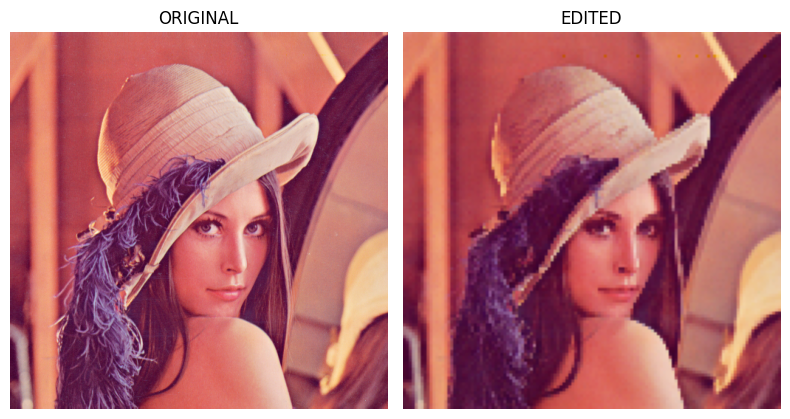

In [ ]:
# coba dengan gambar lain
img_edited_min = block_reduce(img_lena, block_size=BLOCK_SIZE, func=np.min)
plot(imgs=[img_lena, img_edited_min])

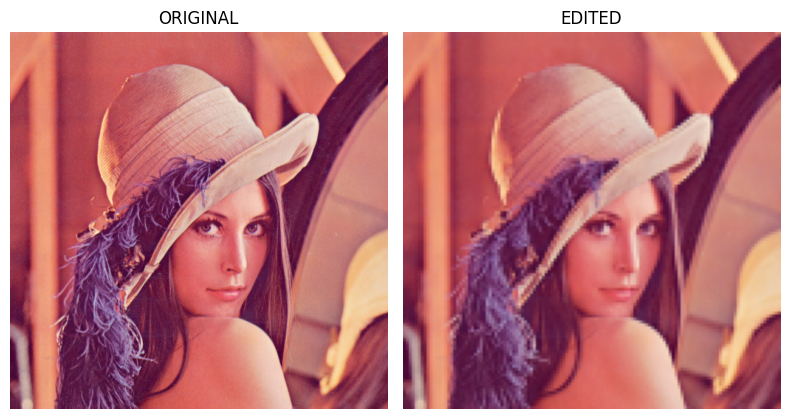

In [ ]:
# coba dengan gambar lain
img_edited_avg = block_reduce(img_lena, block_size=BLOCK_SIZE, func=np.mean).astype(int)
plot(imgs=[img_lena, img_edited_avg])

[ ANSWER HERE ]

### CLAHE
Sekarang, bayangkan Anda memiliki pendekatan baru untuk menyaingi Photonic Engine dari Apple and Adaptive Tetra-squared Pixel dari Samsung dengan menggunakan **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. Bagaimana hasilnya?

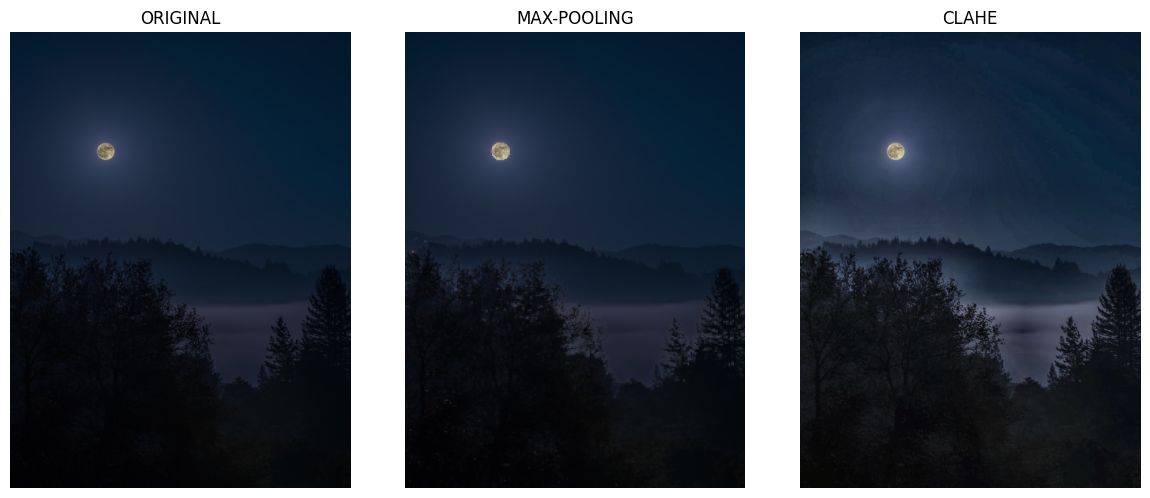

In [ ]:
img_clahe = apply_clahe_rgb(img) # TODO: Panggil fungsi apply_clahe_rgb() dan isi parameter img="photo1.jpeg"
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# [ PERTANYAAN ]
# Apa keunggulan menggunakan CLAHE (daripada Max Pooling) untuk mencerahkan gambar bernuansa gelap?

[ Answer ]

berdasrkan hasil gambarr lena dengan gambar di atas, Dalam mencerahkan gambar bernuansa gelap, CLAHE jelas memiliki keunggulan lebih di mana hasil visual dari CLAHE dapat meningkatkan kontras gambar sehingga area gelap menjadi lebih terang tanpa menghilangkan detail dari gambar. selain itu dengan menggunakan CLAHE gambar menjadi jauh lebih kaya akan detail yang tampak namun tanpa menghilangkan keseimbangan warnanya.

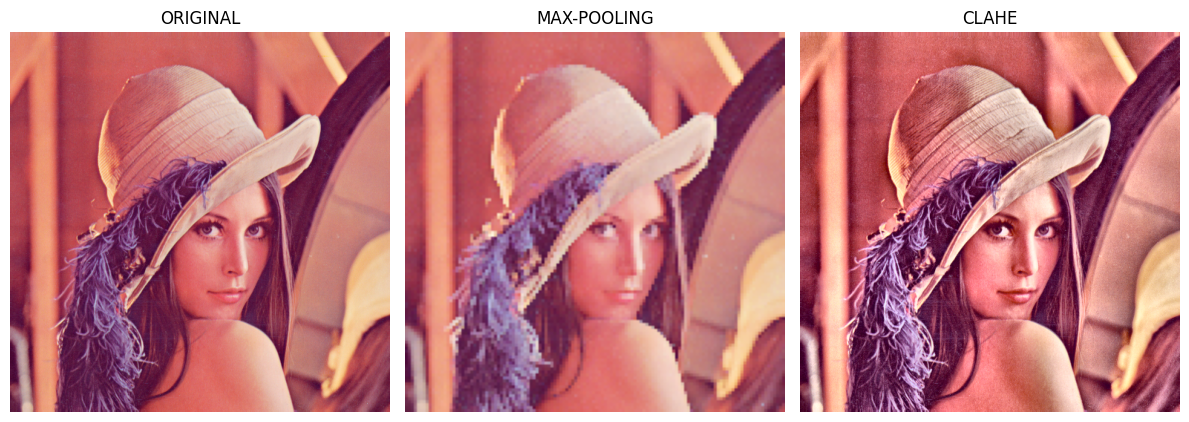

In [ ]:
# coba2 pake gambar lena siapa tau lebih jelas bedanya
img_edited = block_reduce(img_lena, block_size=BLOCK_SIZE, func=np.max)
img_clahe = apply_clahe_rgb(img_lena)
plot(imgs=[img_lena, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

[ ANSWER HERE ]

### Save your edited image

In [ ]:
FILE_NAME = "img_clahe.png" # Berikan nama file` ke gambar yang sudah disempurnakan dengan CLAHE, diakhiri dengan ekstensi .png
imsave(fname=FILE_NAME, arr=img_clahe)

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9